In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [95]:
obgyn = pd.read_csv('../../Data/public health/obgyn.csv')
doct = pd.read_csv('../../Data/public health/hosik_의료인_2010_2021.csv')


In [96]:
obgyn.head(3)

,시도별,시점,산부인과,소아청소년과
0,서울특별시,2006,497,541
1,부산광역시,2006,130,173
2,대구광역시,2006,109,116


In [97]:
obgyn['시점'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [98]:
obgyn['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [99]:
doct['시도별'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '계', '세종'], dtype=object)

In [100]:
doct.head(3)

,시점,시도별,의사,치과의사,한의사,약사,간호사,기타보건의료인
0,2010,서울,23077,5933,3937,7667,28634,4553
1,2010,부산,6247,1300,1134,2194,9268,1894
2,2010,대구,4597,1055,840,1679,6143,1280


In [101]:
doct['시점'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [102]:
doct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시점       213 non-null    int64 
 1   시도별      213 non-null    object
 2   의사       213 non-null    int64 
 3   치과의사     213 non-null    int64 
 4   한의사      213 non-null    int64 
 5   약사       213 non-null    int64 
 6   간호사      213 non-null    int64 
 7   기타보건의료인  213 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 13.4+ KB


In [103]:
# doct 에 시도별에 계 삭제
doct = doct[doct['시도별'] != '계']

In [104]:
# 시도별 이름을 바꾸기 위한 변수
preAreaName=[
    '서울','부산','대구', '인천', '광주', '대전', '울산','세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주']
NexAreaName = [
 '서울특별시','부산광역시','대구광역시', '인천광역시','광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도',
 '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']

# 시도별 재정의
doct.replace(preAreaName,NexAreaName, inplace=True)

In [105]:
df=pd.merge(doct,obgyn, how='left',left_on=['시점','시도별'], right_on=['시점','시도별'] )
df

,시점,시도별,의사,치과의사,한의사,약사,간호사,기타보건의료인,산부인과,소아청소년과
0,2010,서울특별시,23077,5933,3937,7667,28634,4553,445,524
1,2010,부산광역시,6247,1300,1134,2194,9268,1894,101,165
2,2010,대구광역시,4597,1055,840,1679,6143,1280,95,115
3,2010,인천광역시,3212,874,606,1356,4364,1375,77,119
4,2010,광주광역시,2723,783,393,951,4538,870,47,63
...,...,...,...,...,...,...,...,...,...,...
197,2021,전라북도,3680,940,940,1485,8434,2355,48,65
198,2021,전라남도,3199,803,814,1336,8880,2336,18,26
199,2021,경상북도,3627,966,1043,1640,10179,2385,51,71
200,2021,경상남도,5683,1426,1262,2235,15046,3792,61,91


In [106]:
df.tail()

,시점,시도별,의사,치과의사,한의사,약사,간호사,기타보건의료인,산부인과,소아청소년과
197,2021,전라북도,3680,940,940,1485,8434,2355,48,65
198,2021,전라남도,3199,803,814,1336,8880,2336,18,26
199,2021,경상북도,3627,966,1043,1640,10179,2385,51,71
200,2021,경상남도,5683,1426,1262,2235,15046,3792,61,91
201,2021,제주특별자치도,1195,296,251,499,3005,738,23,34


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시점       202 non-null    int64 
 1   시도별      202 non-null    object
 2   의사       202 non-null    int64 
 3   치과의사     202 non-null    int64 
 4   한의사      202 non-null    int64 
 5   약사       202 non-null    int64 
 6   간호사      202 non-null    int64 
 7   기타보건의료인  202 non-null    int64 
 8   산부인과     202 non-null    int64 
 9   소아청소년과   202 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 17.4+ KB


In [108]:
df[df['시도별']=='세종특별자치시']

,시점,시도별,의사,치과의사,한의사,약사,간호사,기타보건의료인,산부인과,소아청소년과
39,2012,세종특별자치시,86,27,27,62,77,58,2,4
56,2013,세종특별자치시,96,31,33,64,93,60,2,4
73,2014,세종특별자치시,124,43,41,82,112,72,3,8
90,2015,세종특별자치시,159,61,54,103,132,80,4,11
107,2016,세종특별자치시,180,74,69,113,139,96,4,13
124,2017,세종특별자치시,239,105,86,149,142,122,4,17
141,2018,세종특별자치시,270,111,99,167,171,155,6,22
158,2019,세종특별자치시,302,121,103,180,220,183,7,21
175,2020,세종특별자치시,441,127,119,227,754,231,7,22
192,2021,세종특별자치시,458,138,125,233,882,229,9,22


In [109]:
df

,시점,시도별,의사,치과의사,한의사,약사,간호사,기타보건의료인,산부인과,소아청소년과
0,2010,서울특별시,23077,5933,3937,7667,28634,4553,445,524
1,2010,부산광역시,6247,1300,1134,2194,9268,1894,101,165
2,2010,대구광역시,4597,1055,840,1679,6143,1280,95,115
3,2010,인천광역시,3212,874,606,1356,4364,1375,77,119
4,2010,광주광역시,2723,783,393,951,4538,870,47,63
...,...,...,...,...,...,...,...,...,...,...
197,2021,전라북도,3680,940,940,1485,8434,2355,48,65
198,2021,전라남도,3199,803,814,1336,8880,2336,18,26
199,2021,경상북도,3627,966,1043,1640,10179,2385,51,71
200,2021,경상남도,5683,1426,1262,2235,15046,3792,61,91


In [110]:
df.set_index(df['시도별'], inplace=True)
df.drop(columns='시도별', inplace=True)
df.head(3)


,시점,의사,치과의사,한의사,약사,간호사,기타보건의료인,산부인과,소아청소년과
시도별,,,,,,,,,
서울특별시,2010,23077,5933,3937,7667,28634,4553,445,524
부산광역시,2010,6247,1300,1134,2194,9268,1894,101,165
대구광역시,2010,4597,1055,840,1679,6143,1280,95,115


In [111]:
df.head(3)

,시점,의사,치과의사,한의사,약사,간호사,기타보건의료인,산부인과,소아청소년과
시도별,,,,,,,,,
서울특별시,2010,23077,5933,3937,7667,28634,4553,445,524
부산광역시,2010,6247,1300,1134,2194,9268,1894,101,165
대구광역시,2010,4597,1055,840,1679,6143,1280,95,115


In [112]:
df[df['시점'] == 2021]

,시점,의사,치과의사,한의사,약사,간호사,기타보건의료인,산부인과,소아청소년과
시도별,,,,,,,,,
서울특별시,2021,32045,7457,5215,9620,58773,10845,397,455
부산광역시,2021,8219,1783,1776,2891,19794,4706,67,132
대구광역시,2021,6083,1367,1211,2163,13983,3398,84,114
인천광역시,2021,5208,1327,1086,1991,12656,3486,59,137
광주광역시,2021,3659,1037,686,1307,9452,2273,36,42
대전광역시,2021,3722,852,774,1284,7871,2125,43,59
울산광역시,2021,1789,511,414,753,5044,1020,32,32
세종특별자치시,2021,458,138,125,233,882,229,9,22
경기도,2021,22813,6231,4875,9269,47108,13320,272,657


In [113]:
# 상관 계수 막대 그래프 찍는 함수 
# a = 시작 컬럼 인덱스, b = 끝 컬럼 인덱스
def DfNameIstotal2makeCorrHeatMap(a, b):
    plt.figure(figsize = (10,6))

    sns.heatmap(
        df.iloc[:,a:b].corr(),
        annot=True,
        annot_kws={"size": 10},
        linewidths= 0.5,
    )
    plt.show()


In [120]:
df.columns

Index(['시점', '의사', '치과의사', '한의사', '약사', '간호사', '기타보건의료인', '산부인과', '소아청소년과'], dtype='object')

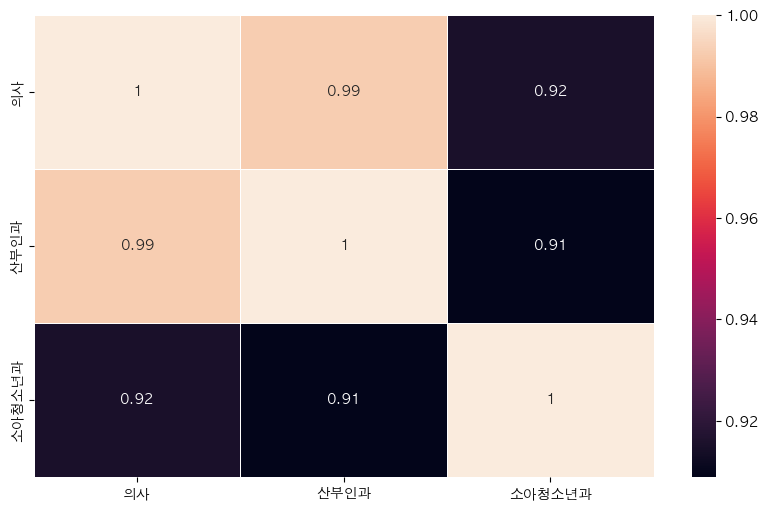

In [129]:
plt.figure(figsize = (10,6))

sns.heatmap(
    df[df['시점']==2020][['의사','산부인과','소아청소년과']].corr(),
    annot=True,
    annot_kws={"size": 10},
    linewidths= 0.5,
)
plt.show()
